# 1D example

Visualization of Gaussian process regression (GPR) using LightGPR on 1D data.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from LightGPR.gp_reg import gp_reg

Generate some 1D dataset

In [31]:
Xtrain_1D = np.random.uniform(0, 10, size=8) # Design vector / features
ytrain_1D = np.sin(Xtrain_1D) # Target values / labels

Create a GPR model and supply the dataset. The default prior mean function is $\mu_{\text{Prior}}(x) = 0$ and the default prior covariance (kernel) function is the RBF kernel.

In [34]:
prior_mean_func = lambda x: -np.sin(x) # 1D prior mean function
model_1D = gp_reg(Xtrain_1D, ytrain_1D, prior_mean=prior_mean_func)#, kernel='RQ')

Train the GPR model. The hyperparameters of the kernel are then optimized via maximum likelihood method.

In [35]:
model_1D.train()
print(f"Loss: {model_1D.loss}, Outputscale: {model_1D.outputscale}, Hyperparams: {model_1D.kernel_hyperparams}, Noise: {model_1D.ynoise}")

Loss: 6.8588564686367635, Outputscale: 2.474120337202328, Hyperparams: [2.14913748], Noise: 1e-10


Make predictions with the trained GPR model at test locations `Xtest_1D`. The method `predict(Xtest_1D)` returns the posterior mean (regression) and variance (square of the uncertainty) at the test locations.

In [36]:
Xtest_1D = np.linspace(0, 10, 1000)
mean_post_1D, var_post_1D = model_1D.predict(Xtest_1D)

Plot the results

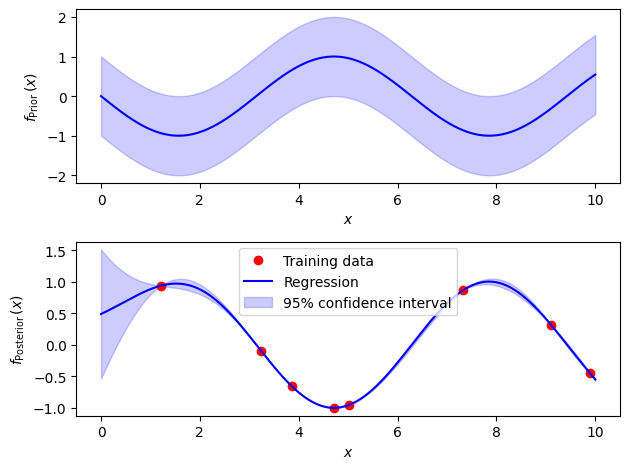

In [44]:

fig, ax = plt.subplots(2, 1)
ax[0].plot(Xtest_1D, prior_mean_func(Xtest_1D), 'b-', label='Prior mean')
ax[0].fill_between(Xtest_1D, prior_mean_func(Xtest_1D) - 1, prior_mean_func(Xtest_1D) + 1, color='b', alpha=0.2, label='95% confidence interval')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f_{\text{Prior}} \, (x)$')

ax[1].plot(Xtrain_1D, ytrain_1D, 'ro', label='Training data')
ax[1].plot(Xtest_1D, mean_post_1D, 'b-', label='Regression')
ax[1].fill_between(Xtest_1D, mean_post_1D - 2*np.sqrt(var_post_1D), mean_post_1D + 2*np.sqrt(var_post_1D), color='b', alpha=0.2, label='95% confidence interval')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$f_{\text{Posterior}} \, (x)$')
ax[1].legend()
fig.tight_layout()
plt.show()

# 2D dataset

Higher-dimensional datasets are treated analogously:

In [7]:
# Generate some 2D dataset
Xtrain = np.random.rand(10,2) # Design vector / features
ytrain = np.sin(Xtrain[:,0]) + np.cos(Xtrain[:,1]) # Target values / labels

# Create GPR model
model = gp_reg(Xtrain, ytrain)#, kernel='RQ')

# Train GPR model
model.train()
print(f"Loss: {model.loss}, Outputscale: {model.outputscale}, Hyperparams: {model.kernel_hyperparams}, Noise: {model.ynoise}")

Loss: -23.613312772860304, Outputscale: 1.1908014349959528, Hyperparams: [2.07633326 2.08942602], Noise: 1e-10


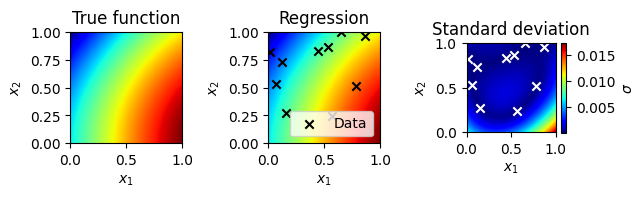

In [8]:
# Make predictions at test points
test_grid = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
Xtest = np.array(list(zip(test_grid[0].ravel(), test_grid[1].ravel())))
mean_post, var_post = model.predict(Xtest)

# Plot results
fig, ax = plt.subplots(1, 3)
ax[0].imshow(np.sin(test_grid[0]) + np.cos(test_grid[1]), cmap='jet', extent=[0,1,0,1], origin='lower')
ax[0].set_title('True function')
ax[0].set_ylabel(r'$x_2$')
ax[0].set_xlabel(r'$x_1$')

ax[1].imshow(mean_post.reshape(test_grid[0].shape), cmap='jet', extent=[0,1,0,1], origin='lower')
ax[1].scatter(Xtrain[:,0], Xtrain[:,1], c='k', marker='x', label='Data')
ax[1].set_title('Regression')
ax[1].set_ylabel(r'$x_2$')
ax[1].set_xlabel(r'$x_1$')
ax[1].legend()

im3 = ax[2].imshow(np.sqrt(var_post).reshape(test_grid[0].shape), cmap='jet', extent=[0,1,0,1], origin='lower')
ax[2].scatter(Xtrain[:,0], Xtrain[:,1], c='w', marker='x', label='Training data')
fig.colorbar(im3, ax=ax[2], label=r'$\sigma$', shrink=0.2)
ax[2].set_title('Standard deviation')
ax[2].set_ylabel(r'$x_2$')
ax[2].set_xlabel(r'$x_1$')
fig.tight_layout()
plt.show()